# Inventory dynamics problem with stochastic demand

Using bus engine replacement model as an analogy, in this exercise you’ll continue developing the inventory model from the first lecture on dynamic programming (video 27),
and extend it to the infinite horizon case with stochastic demand.

## Inventory dynamics model

Recall the inventory management problem in discrete time and finite horizon $ t=0,\dots,T $

The notation is:

- $ x_t\ge 0 $ is inventory at period $ t $  
- $ d_t\ge 0 $ is *stochastic* demand at period $ t $  
- $ q_t\ge 0 $ is the order of new inventory  
- $ p $ is the profit per one unit of (supplied) good  
- $ c $ is the fixed cost of ordering any amount of new inventory  
- $ r $ is the cost of storing one unit of good  


The sales in period $ t $ are given by $ s_t = \min\{x_t,d_t\} $.

Inventory to be stored till next period is given by $ k_t = \max\{x_t-d_t,0\} + q_t = x_{t+1} $.

The profit in period $ t $ is given by

$$
\begin{eqnarray}
\pi_t & = & p \cdot \text{sales}_t - r \cdot x_{t+1} - c \cdot (\text{order made in period }t) \\
& = & s_t p - k_t r - c \mathbb{1}\{q_t>0\}
\end{eqnarray}
$$

Assuming all $ q_t \ge 0 $, let $ \sigma =  \{q_t\}_{t=1,\dots,T} $ denote a feasible inventory policy.

If $ d_t $ is stochastic the policy becomes a function of the period $ t $ inventory $ x_t $.

The expected profit maximizing problem is given by

$$
{\max}_{\sigma} \mathbb{E}\Big[ \sum_{t=0}^{T} \beta^t \pi_t \Big],
$$

where $ \beta $ is discount factor.

### Bellman equation for the problem

$$
\begin{eqnarray}
V(x_t,d_t) &=& \max_{q_t \ge 0} \Big\{ \pi_t + \beta \mathbb{E}\Big[ V\big(x_{t+1} , d_{t+1} \big) \Big| x_t,d_t,q_t \Big] \Big\} \\
&=& \max_{q_t \ge 0} \Big\{ s_t p - k_t r - c \mathbb{1}\{q_t>0\}
+ \beta \mathbb{E}\Big[ V\big( k_t, d_{t+1} \big) \Big] \Big\}
\end{eqnarray}
$$

$$
\begin{eqnarray}
s_t &=& \min\{x_t,d_t\} \\
k_t &=& \max\{x_t-d_t,0\} + q_t
\end{eqnarray}
$$

The expectation in the Bellman equation is taken over the distribution of the next period demand $ d_{t+1} $, which according to the problem is independent of any other variables (idiosyncratic), thus the conditioning on $ (x_t,d_t,q_t) $ can be meaningfully dropped.  Expectation can be written as an integral over the distribution of demand $ F(d) $.

$$
V(x_t,d_t)
= \max_{q_t \ge 0} \Big\{ s_t p - k_t r - c \mathbb{1}\{q_t>0\}
+ \beta \int V\big( k_t, d \big) \partial F(d)  \Big\}
$$

### Dropping the time subscripts

Because we’ll be solving the problem in infinite horizon, the time subscripts can be dropped, and we can just have current period variables $ x,d,q,s,k $, and next period variables denoted by prime, i.e. $ x' $

The Bellman equation is then

$$
\begin{eqnarray}
V(x,d) &=& \max_{q \ge 0} \Big\{ \pi + \beta \mathbb{E}\Big[ V\big(x', d' \big) \Big| x,d,q \Big] \Big\} \\
&=& \max_{q \ge 0} \Big\{ s\cdot p - k\cdot  r - c \mathbb{1}\{q>0\}
+ \beta \mathbb{E}\Big[ V\big( k, d' \big) \Big] \Big\}
\end{eqnarray}
$$

$$
\begin{eqnarray}
s &=& \min\{x,d\} \\
k &=& \max\{x-d,0\} + q
\end{eqnarray}
$$

### Bellman equation in expected value function space

Note that similar to the bus engine replacement model, the inventory model features random variable which distribution does not depend on the previous period variables (it is *idiosyncratic*).

In this case it is possible to reduce the dimensionality of the fixed point problem by rewriting the Bellman operator in expected value function terms.

$$
EV(x') =  \mathbb{E}\Big[ V\big(x', d' \big) \Big| x,d,q \Big] =  \mathbb{E}\Big[ V\big(x', d' \big) \Big],
$$

where the expectation is taken over the distribution of the next period demand $ d' $.
The conditioning on $ x,d,q $ can be dropped exactly because $ d' $ is idiosyncratic.

We can then write the Bellman equation as

$$
V(x,d) = \max_{q \ge 0} \Big\{ s\cdot p - k\cdot  r - c \mathbb{1}\{q>0\}
+ \beta EV(k) \Big\}
$$

$$
V(x,d) = \max_{q \ge 0} \Big\{ p \min\{x,d\} - r ( \max\{x-d,0\} + q ) - c \mathbb{1}\{q>0\}
+ \beta EV(\max\{x-d,0\} + q) \Big\}
$$

Taking the expectation with respect to $ d $ on both sides, we get

$$
EV(x) = \mathbb{E}\Big[ \max_{q \ge 0} \Big\{ p \min\{x,d\} - r ( \max\{x-d,0\} + q ) - c \mathbb{1}\{q>0\}
+ \beta EV(\max\{x-d,0\} + q) \Big\} \Big]
$$

By assumption the inventory is discrete, and so it is natural to assume that the demand is also represented as a discrete random variable.  Then the expectation can be written as a sum weighted with
the corresponding probabilities $ pr(d) $, as

$$
EV(x) = \sum_{d} \Big[ \max_{q \ge 0} \Big\{ p \min\{x,d\} - r ( \max\{x-d,0\} + q ) - c \mathbb{1}\{q>0\}
+ \beta EV(\max\{x-d,0\} + q) \Big\} \Big] pr(d)
$$

This is functional equation in $ EV $ which is also a contraction mapping!

### Specification of stochastic demand

Assume that $ d(t) $ is stochastic and follows a truncated geometric distribution with the support
$ k \in \{0,1,2,\dots\} $  and corresponding probabilities $ P(k)=(1-p)^k p $, where $ p $ is a fixed parameter.  Implement this distribution with the probability mass from the tail collected at the upper bound, assuming the maximum value of the demand is the same as the maximum inventory.

### Tasks

1. Copy the implementation of the inventory model from the lecture notebook (27) to serve the starter code  
1. Add `demand_pr()` method to compute the probabilities for the random demand (modelling demand as discrete random variable with support the same as the inventory grid). Include the functionality to plot these probabilities.  
1. Implement Bellman equation similar to the Rust bus engine model, as class method  
1. Implement VFI solver for the infinite horizon stochastic inventory problem, also as class method  
1. Initialize the model using reasonable parameter values, plot demand distribution  
1. Solve the model with VFI and make nice plots to illustrate convergence of the value and the policy functions to the solution.  

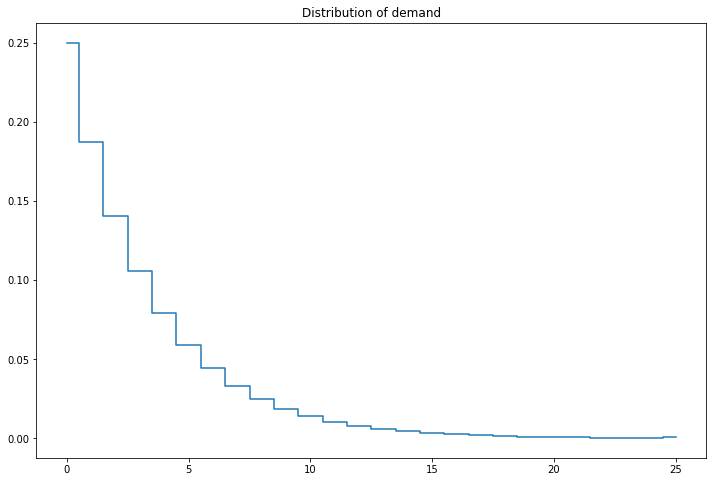

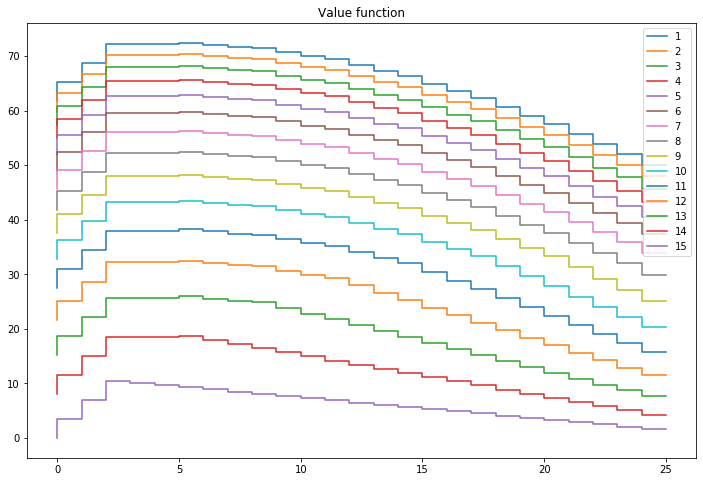

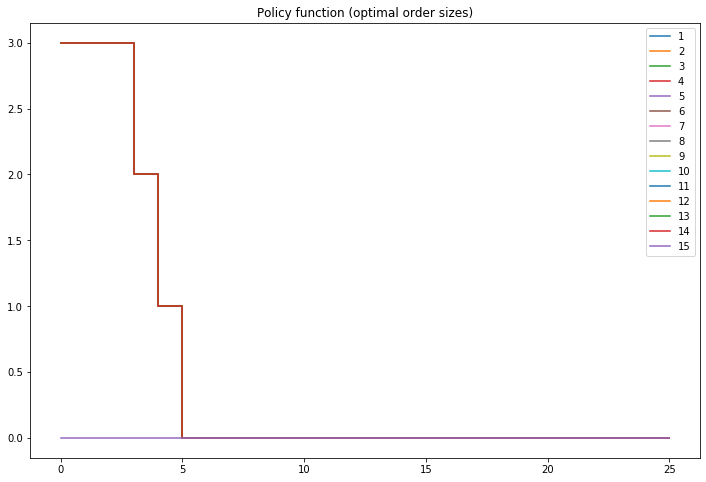

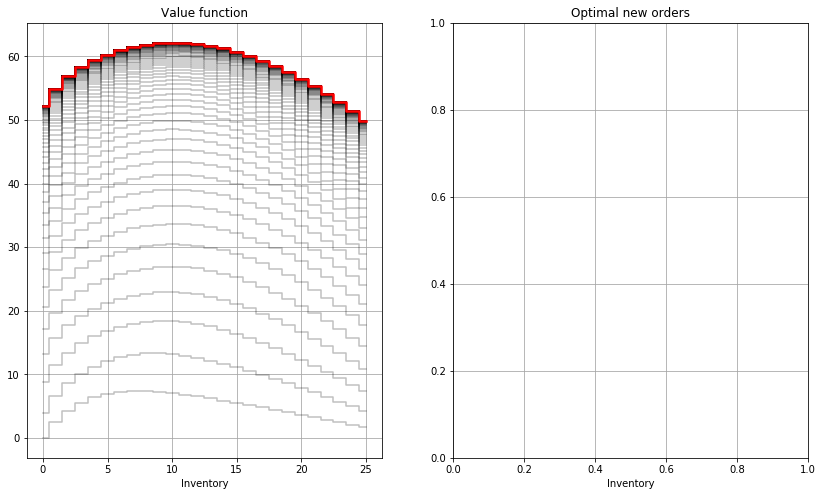

(array([52.25809537, 54.88309537, 56.85184537, 58.32840787, 59.43582974,
        60.26639615, 60.93522182, 61.45344021, 61.82590961, 62.05733162,
        62.15225614, 62.11508633, 61.95008328, 61.66137065, 61.25293908,
        60.72865046, 60.09224212, 59.34733082, 58.49741666, 57.54588682,
        56.49601924, 55.3509861 , 54.11385725, 52.78760353, 51.37509993,
        49.8791287 ]),
 None)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

class inventory_model:
    '''Small class to hold model fundamentals and its solution'''

    def __init__(self,label='noname',
                 max_inventory=10,  # upper bound on the state space
                 c = 3.2,            # fixed cost of order
                 p = 2.5,           # profit per unit of good
                 r = 0.5,           # storage cost per unit of good
                 β = 0.95,          # discount factor
                 dp = 0.5,          # parameter in geometric distribution of demand
                 demand = 4         # fixed demand
                 ):
        '''Create model with default parameters'''
        self.label=label # label for the model instance
        self.c, self.p, self.r, self.β, self.dp= c, p, r, β, dp
        self.demand = demand
        # created dependent attributes (it would be better to have them updated when underlying parameters change)
        self.n = max_inventory+1    # number of inventory levels
        self.upper = max_inventory  # upper boundary on inventory
        self.x = np.arange(self.n)  # all possible values of inventory and demand (state space)

    def __repr__(self):
        '''String representation of the model'''
        return 'Inventory model labeled "{}"\nParamters (c,p,r,β) = ({},{},{},{})\nDemand={}\nUpper bound on inventory {}' \
               .format (self.label,self.c,self.p,self.r,self.β,self.demand,self.upper)

    def sales(self,x,d):
        '''Sales in given period'''
        return np.minimum(x,d)

    def next_x(self,x,d,q):
        '''Inventory to be stored, becomes next period state'''
        return x - self.sales(x,d) + q

    def profit(self,x,d,q):
        '''Profit in given period'''
        return self.p * self.sales(x,d) - self.r * self.next_x(x,d,q) - self.c * (q>0)

    def demand_pr(self,plot=False):
        '''Computes stochastic demand probs'''
        k = np.arange(self.n)  # all possible values of demand
        pr = (1-self.dp)**k *self.dp
        pr[-1] = 1 - pr[:-1].sum()  # update last prob to ensure sum=1
        if plot:
            plt.step(self.x,pr,where='mid')
            plt.title('Distribution of demand')
            plt.show()
        return pr

def bellman(m,v0):
    '''Bellman equation for inventory model
       Inputs: model object
               next period value function
    '''
    # create the grid of choices (same as x), column-vector
    q = m.x[:,np.newaxis]
    # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
    p = m.profit(m.x,m.demand,q)
    # indexes for next period value with extrapolation using last value
    i = np.minimum(m.next_x(m.x,m.demand,q),m.upper)
    # compute the Bellman maximand
    vm = p + m.β*v0[i]
    # find max and argmax
    v1 = np.amax(vm,axis=0)   # maximum in every column
    q1 = np.argmax(vm,axis=0) # arg-maximum in every column = order volume
    return v1, q1

def solver_backwards_induction(m,T=10,verbose=False):
    '''Backwards induction solver for the finite horizon case'''
    # solution is time dependent
    m.value  = np.zeros((m.n,T))
    m.policy = np.zeros((m.n,T))
    # main DP loop (from T to 1)
    for t in range(T,0,-1):
        if verbose:
            print('Time period %d\n'%t)
        j = t-1 # index of value and policy functions for period t
        if t==T:
            # terminal period: ordering zero is optimal
            m.value[:,j] = m.profit(m.x,m.demand,np.zeros(m.n))
            m.policy[:,j] = np.zeros(m.n)
        else:
            # all other periods
            m.value[:,j], m.policy[:,j] = bellman(m,m.value[:,j+1]) # next period to Bellman
        if verbose:
            print(m.value,'\n')
    # return model with updated value and policy functions
    return m

def plot_solution(model):
    plt.step(model.x,model.value)
    plt.legend([f'{i+1}' for i in range(model.value.shape[1])])
    plt.title('Value function')
    plt.show()
    plt.step(model.x,model.policy)
    plt.legend([f'{i+1}' for i in range(model.policy.shape[1])])
    plt.title('Policy function (optimal order sizes)')
    plt.show()

def bellman_ev(m,ev0):
    '''Bellman equation for inventory model
       Inputs: model object
               next period EXPECTED value function
    '''
    pr = m.demand_pr()
    ev1 = np.zeros(shape=m.x.shape)
    for j,d in enumerate(m.x):  # over all values of demand
        # create the grid of choices (same as x), column-vector
        q = m.x[:,np.newaxis]
        # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
        p = m.profit(m.x,d,q)
        # indexes for next period value with extrapolation using last value
        i = np.minimum(m.next_x(m.x,d,q),m.upper)
        # compute the Bellman maximand
        vm = p + m.β*ev0[i]
        # find max and argmax
        v1 = np.amax(vm,axis=0)  # maximum in every column
        ev1 = ev1 + pr[j]*v1
#     q1 = np.argmax(vm,axis=0) # arg-maximum in every column = order volume
    q1 = None
    return ev1, q1

def solve_vfi(self,tol=1e-6,maxiter=500,callback=None):
    '''Solves the Rust model using value function iterations
    '''
    ev0 = np.zeros(self.n) # initial point for VFI
    for i in range(maxiter):  # main loop
        ev1, q1 = bellman_ev(self,ev0)  # update approximation
        err = np.amax(np.abs(ev0-ev1))
        if callback != None: callback(iter=i,err=err,ev1=ev1,ev0=ev0,q1=q1,model=self)
        if err<tol:
            break  # break out if converged
        ev0 = ev1  # get ready to the next iteration
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return ev1, q1

def solve_show(self,maxiter=1000,tol=1e-6,**kvargs):
    '''Illustrate solution'''
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
    ax1.grid(b=True, which='both', color='0.65', linestyle='-')
    ax2.grid(b=True, which='both', color='0.65', linestyle='-')
    ax1.set_xlabel('Inventory')
    ax2.set_xlabel('Inventory')
    ax1.set_title('Value function')
    ax2.set_title('Optimal new orders')
    def callback(**argvars):
        mod, ev, q = argvars['model'],argvars['ev1'],argvars['q1']
        ax1.step(mod.x,ev,color='k',alpha=0.25,where='mid')
#         ax2.plot(mod.x,q,color='k',alpha=0.25)
    ev,pk = solve_vfi(self,maxiter=maxiter,tol=tol,callback=callback,**kvargs)
    # add solutions
    ax1.step(self.x,ev,color='r',linewidth=2.5,where='mid')
#     ax2.plot(self.x,pk,color='r',linewidth=2.5)
    plt.show()
    return ev,pk

mod = inventory_model(label='production',max_inventory=25)
mod.dp=.25
mod.demand = int((1-mod.dp)/mod.dp)
mod.c = .25
mod.p = 3.5
mod.r = 0.4
mod.β = 0.9
mod.demand_pr(plot=True)
mod = solver_backwards_induction(mod,T=15)
plot_solution(mod)

solve_vfi(mod)
solve_show(mod)

In [2]:
def optimal_policy(m,ev):
    '''Computes the optimal policy function for the stochastic
    inventory dynamics model for given EV function'''
    # idea: 3-dim array with q in axes 0, d in axis 1 and x in axis 2
    q = m.x[:,np.newaxis,np.newaxis]  # choices
    d = m.x[np.newaxis,:,np.newaxis]  # demand
    x = m.x[np.newaxis,np.newaxis,:]  # inventories
    # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
    p = m.profit(x,d,q)  # 3-dim array
    # indexes for next period value with extrapolation using last value
    i = np.minimum(m.next_x(x,d,q),m.upper)
    # compute the Bellman maximand
    vm = p + m.β*ev[i]
    # find argmax and argmax
    return np.argmax(vm,axis=0)  # maximum in every column

mod = inventory_model(max_inventory=15)
mod.dp=.25
mod.demand = int((1-mod.dp)/mod.dp)
mod.c = .25
mod.p = 3.5
mod.r = 0.4
mod.β = 0.9
ev,q = solve_vfi(mod)
q = optimal_policy(mod,ev)
print('Optimal orders of new inventory for d,x:\n(d in rows, x in columns)')
print(q)
# Note the symmetry in the optimal policy!
# This implies that knowing both x and d is not necessary for the
# optional new order, it's enough to condition on the inventory
# remaining after sales, i.e. x-min(x,d) = max(0,x-d)

Optimal orders of new inventory for d,x:
(d in rows, x in columns)
[[7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0]
 [7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0]
 [7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0]
 [7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0]
 [7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0]
 [7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0]
 [7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0]
 [7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0]
 [7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0]
 [7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0]
 [7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2]
 [7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]]


In [3]:
# Solution video: https://youtu.be/JSdjTmaXr0w